<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/DEEP_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [ ]:
# Load the dataset
data = pd.read_csv('kidney_disease.csv')

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
# Handling missing values
data = data.replace('?', pd.NA)
data = data.dropna()

In [ ]:
# Convert categorical variables to numerical using LabelEncoder
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
data.shape

(158, 26)

In [ ]:
# Separate features and labels
X = data.drop('classification', axis=1)
y = data['classification']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    int64  
 7   pc              158 non-null    int64  
 8   pcc             158 non-null    int64  
 9   ba              158 non-null    int64  
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    object 


In [ ]:
data.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,0.886076,0.816456,0.088608,0.075949,...,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.120253,0.126582,0.101266,0.727848
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,...,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def fill_nans():
    for col in data.columns:
        if data[col].dtype == 'float64':
            new_col = str(col + '_filled')
            data[new_col] = data[col].transform(lambda x: x.fillna(x.median()))
    return data

fill_nans()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,bp_filled,sg_filled,al_filled,su_filled,bgr_filled,bu_filled,sc_filled,sod_filled,pot_filled,hemo_filled
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


In [ ]:
data.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [ ]:
data.shape

(158, 37)

In [ ]:
# Separate features and labels
X = data.drop('classification', axis=1)
y = data['classification']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Feature Selection using Extra Trees Classifier: We will use the Extra Trees Classifier to select important features from the dataset.


# New Section

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model and get feature importances
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
# Select important features
important_features_indices = et_clf.feature_importances_.argsort()[::-1]
important_features = X.columns[important_features_indices]
num_features_to_select = 12  # You can choose any number of top features

In [ ]:
# Select the top 'num_features_to_select' features
selected_features = important_features[:num_features_to_select]

In [ ]:
# Filter the data to keep only the selected features
X_train_selected = X_train[:, important_features_indices[:num_features_to_select]]
X_test_selected = X_test[:, important_features_indices[:num_features_to_select]]

InvalidIndexError: (slice(None, None, None), array([28, 19,  4, 20, 16,  7, 12, 35,  0,  3, 18, 27]))

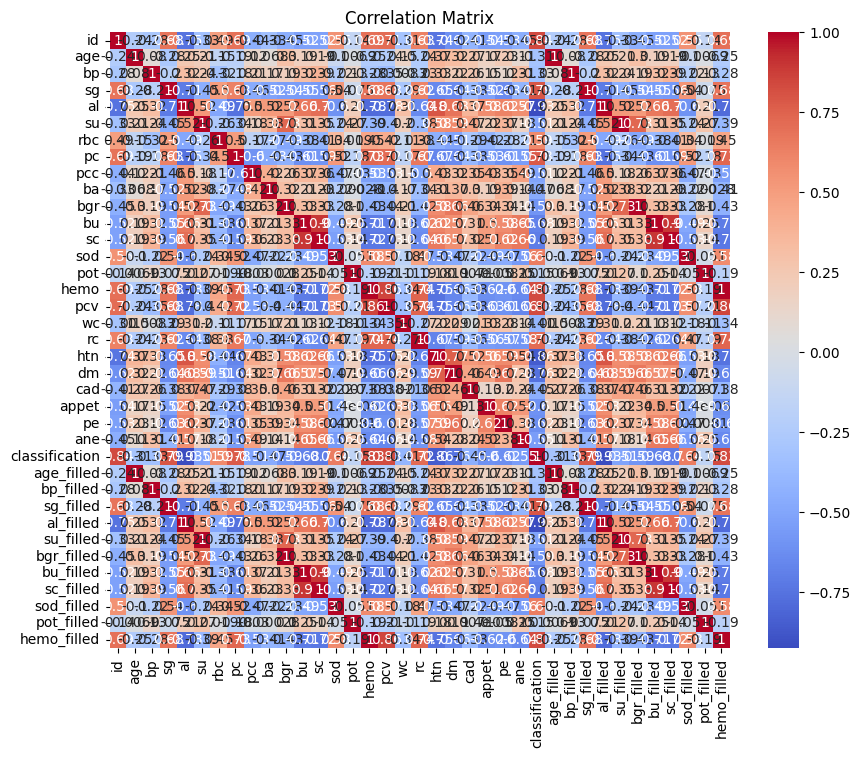

In [ ]:
# Plot the correlation matrix using a heatmap
import seaborn as sns
import seaborn as sns
# Compute the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

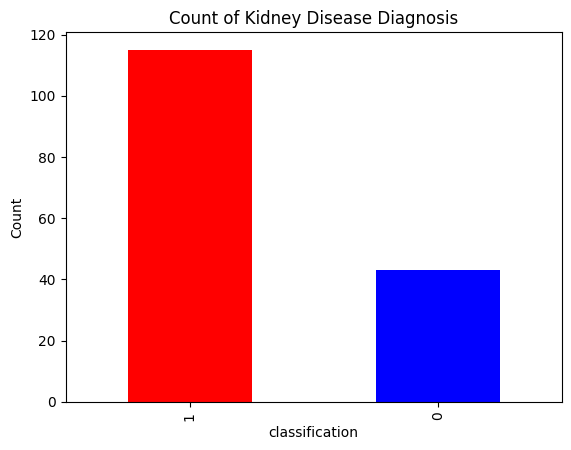

In [ ]:
data['classification'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Count of Kidney Disease Diagnosis")
plt.xlabel("classification")
plt.ylabel("Count")
plt.show()

# **Create and train the DNN for feature extraction**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from xgboost import XGBClassifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Adjust the architecture to ensure the output matches input dimensions (36)
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(36, activation='linear')  # Output layer with 36 dimensions to match input
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse')

# Train the model (input and output should be the same for autoencoder-style training)
dnn_model.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=32, verbose=0)




In [ ]:
# Extract features using the trained DNN (remove the output layer to get the feature representation)
feature_extractor = Sequential(dnn_model.layers[:-1])
X_train_features = feature_extractor.predict(X_train_scaled)
X_test_features = feature_extractor.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
# Train XGBoost on the extracted features
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_features, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test_features)
y_pred_proba = xgb_model.predict_proba(X_test_features)[:, 1]

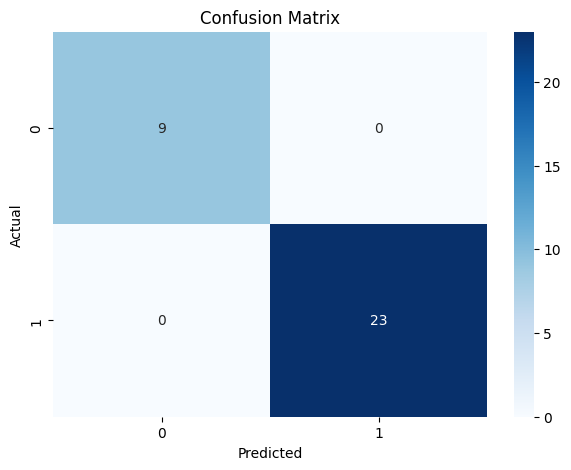

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



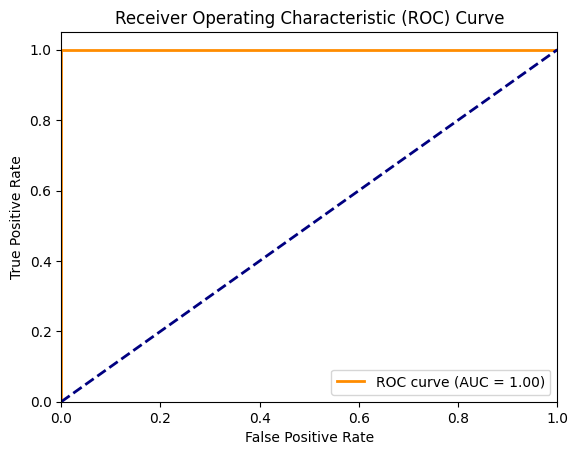

In [ ]:
 #ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create the gradio interface

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [ ]:
import gradio as gr
# Gradio Interface
def predict_ckd(age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane):
    input_data = np.array([[age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane]])
    input_scaled = scaler.transform(input_data)
    features = feature_extractor.predict(input_scaled)
    prediction = xgb_model.predict_proba(features)[0]
    return {"No CKD": float(prediction[0]), "CKD": float(prediction[1])}

iface = gr.Interface(
    fn=predict_ckd,
    inputs=[
        gr.Slider(0, 100, label="Age"),
        gr.Slider(0, 180, label="Blood Pressure"),
        gr.Slider(1.005, 1.025, label="Specific Gravity"),
        gr.Slider(0, 5, label="Albumin"),
        gr.Slider(0, 5, label="Sugar"),
        gr.Radio(["normal", "abnormal"], label="RBC"),
        gr.Radio(["normal", "abnormal"], label="Pus Cell"),
        gr.Radio(["present", "notpresent"], label="Pus Cell Clumps"),
        gr.Radio(["present", "notpresent"], label="Bacteria"),
        gr.Slider(70, 490, label="Blood Glucose Random"),
        gr.Slider(10, 200, label="Blood Urea"),
        gr.Slider(0.4, 15.0, label="Serum Creatinine"),
        gr.Slider(110, 150, label="Sodium"),
        gr.Slider(2.5, 6.5, label="Potassium"),
        gr.Slider(3.1, 17.8, label="Hemoglobin"),
        gr.Slider(21, 54, label="Packed Cell Volume"),
        gr.Slider(3800, 11000, label="White Blood Cell Count"),
        gr.Slider(2.1, 8.0, label="Red Blood Cell Count"),
        gr.Radio(["yes", "no"], label="Hypertension"),
        gr.Radio(["yes", "no"], label="Diabetes Mellitus"),
        gr.Radio(["yes", "no"], label="Coronary Artery Disease"),
        gr.Radio(["good", "poor"], label="Appetite"),
        gr.Radio(["yes", "no"], label="Pedal Edema"),
        gr.Radio(["yes", "no"], label="Anemia")
    ],
    outputs=gr.Label(num_top_classes=2),
    live=True,
    title="Chronic Kidney Disease Prediction"
)


In [ ]:
def predict_ckd(age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane):
    # Convert categorical inputs to numerical values
    rbc = 1 if rbc == "abnormal" else 0
    pc = 1 if pc == "abnormal" else 0
    pcc = 1 if pcc == "present" else 0
    ba = 1 if ba == "present" else 0
    htn = 1 if htn == "yes" else 0
    dm = 1 if dm == "yes" else 0
    cad = 1 if cad == "yes" else 0
    appet = 1 if appet == "good" else 0
    pe = 1 if pe == "yes" else 0
    ane = 1 if ane == "yes" else 0

    # Create an array of inputs
    input_data = np.array([[age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane]])

    print(f"Input Data: {input_data}")  # Debugging print

    # Scale the input data using the trained scaler
    try:
        input_scaled = scaler.transform(input_data)
        print(f"Scaled Data: {input_scaled}")  # Debugging print
    except Exception as e:
        print(f"Error during scaling: {e}")
        return {"Error": "Failed to scale input data"}

    # Extract features using the trained feature extractor
    try:
        features = feature_extractor.predict(input_scaled)
        print(f"Extracted Features: {features}")  # Debugging print
    except Exception as e:
        print(f"Error during feature extraction: {e}")
        return {"Error": "Failed to extract features"}

    # Predict CKD probabilities using the trained XGBoost model
    try:
        prediction = xgb_model.predict_proba(features)[0]
        print(f"Prediction: {prediction}")  # Debugging print
        return {"No CKD": float(prediction[0]), "CKD": float(prediction[1])}
    except Exception as e:
        print(f"Error during prediction: {e}")
        return {"Error": "Failed to make prediction"}


In [ ]:
# Launch the interface
iface.launch(share=True, debug=True)


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23f3ffc83c6ce783ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Check if the model is overfiting**

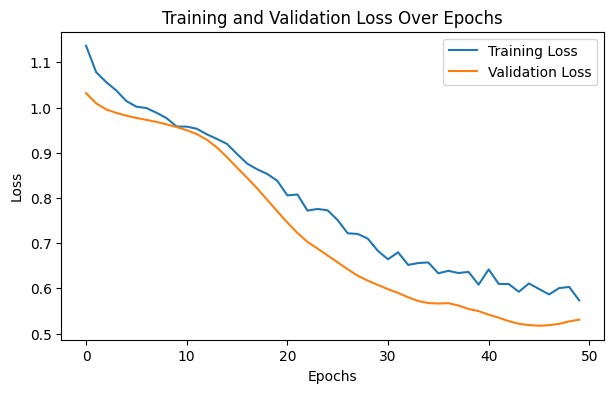

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, X_train_scaled, test_size=0.2, random_state=42)

# Define the model architecture
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(36, activation='linear')  # Output layer with same dimension as input
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse')

# Train the model and validate at the same time
history = dnn_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=50, batch_size=32, verbose=0
)

# Plot the training and validation loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
